#Technical Indicator

#Based on stock of Facebook, Inc. (FB) May 20,2019 - May 20, 2020

#Overlays:
#1.Bollinger Bands: 
   A chart overlay that shows the upper and lower limits of 'normal' price movements based on the Standard Deviation of prices. Main components of a Bollinger Bands are Upper Band, the upper band is simply two standard deviations above the moving average of a stock's price, Middle Band, the middle band is simply the moving average of the stock's price, and Lover Band, two standard deviations below the moving average is the lower band.

In [1]:
#import needed libraries
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as web

/Users/jialingshi/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
#Make function for calls to Yahoo Finance
def get_adj_close(ticker,start,end):    #A function that takes ticker symbols, strating period, ending period
    start = start                       #as arguments and returns with a Pandas DataFrame of the Adjusted Close Prices
    end = end                           #for the tickers from Yahoo Finance
    info = web.DataReader(ticker, data_source='yahoo',start=start,end=end)['Adj Close']
    return pd.DataFrame(info)

In [3]:
#Get Adjusted Closing Prices for Facebook between May 20,2019 - May 20, 2020
fb = get_adj_close('fb','20/5/2019','19/5/2020')

In [178]:
#Calculate 30 Day Moving Average, Std Deviation, Upper Band and Lower Band
#set.std(ddof=0)for population std instead of sample
fb['30 Day MA'] = fb['Adj Close'].rolling(window=20).mean()
fb['30 Day MA']

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
248    195.319002
249    196.847002
250    198.429002
251    200.176502
252    202.480502
Name: 30 Day MA, Length: 253, dtype: float64

In [180]:
fb['30 Day STD'] = fb['Adj Close'].rolling(window=20).std()

In [181]:
fb['Upper Band'] = fb['30 Day MA'] + (fb['30 Day STD']*2)
fb['Upper Band']

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
248    223.440953
249    223.907285
250    224.847075
251    225.575676
252    224.837277
Name: Upper Band, Length: 253, dtype: float64

In [182]:
fb['Lower Band'] = fb['30 Day MA'] - (fb['30 Day STD']*2)
fb['Lower Band']

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
248    167.197052
249    169.786719
250    172.010930
251    174.777329
252    180.123728
Name: Lower Band, Length: 253, dtype: float64

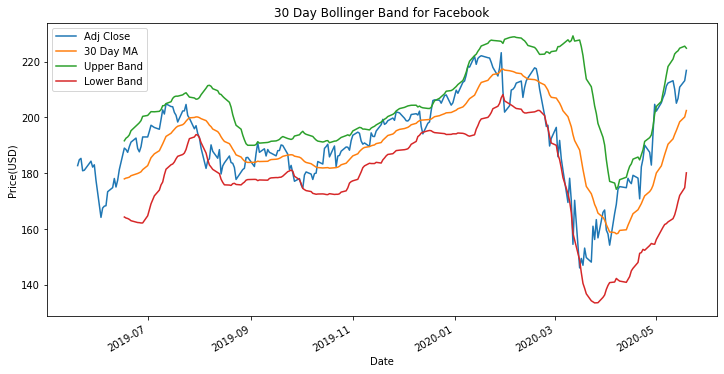

In [8]:
#Simple 30 Day Bollinger Band for Facebook between May 20,2019 - May 20, 2020
fb[['Adj Close','30 Day MA','Upper Band','Lower Band']].plot(figsize=(12,6))
plt.title('30 Day Bollinger Band for Facebook')
plt.ylabel('Price(USD)')
plt.show();

#2.Chandelier Exit: Chandelier Exit is based on the Average True Range (ATR) indicator.It is designed to keep traders in the trend until a defined trend reversal happens. Traders use CE to maximize their returns in a trade and make stop loss exit decisions.

In [9]:
import numpy
import talib
from logic import MarketTrend
from logic import Indicator
from logic.candle import Candle    
#ModuleNotFoundError: No module named 'logic'.

ModuleNotFoundError: No module named 'logic'

#3.Ichimoku Cloud: The Ichimoku Cloud is a collection of technical indicators that show support and resistance levels,as well as momentum and trend direction. It does this by taking multiple averages and plotting them on the chart. It also uses these figures to compute a "cloud" which attempts to forecast where the price may find support or resistance in the future. 

In [10]:
import pandas as pd
from pandas_datareader import data, wb
import matplotlib as mpl
from mpl_finance import candlestick_ohlc
import matplotlib.dates as dates
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

/Users/jialingshi/opt/anaconda3/lib/python3.7/site-packages/mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


In [11]:
start = datetime.datetime(2019,5,20)
end = datetime.datetime(2020,5,19)
d = data.DataReader('fb','yahoo',start,end)

In [12]:
#convert dates to integer values for later use with the matplotlib candlestick charting function (it doesn't accept datetimes)
d['Dates'] = dates.date2num(d.index)

In [13]:
#Tenkan-sen(Conversion Line):(9-period high + 9-period low)/2
nine_period_high = d['High'].rolling(window=9).max()
nine_period_low = d['Low'].rolling(window=9).min()
d['tenkan_sen']=(nine_period_high + nine_period_low)/2

In [14]:
#Kijun-sen(Base Line):(26-period high + 26-period low)/2
period26_high = d['High'].rolling(window=26).max()
period26_low = d['Low'].rolling(window=26).min()
d['kijun_sen']=(period26_high + period26_low)/2

In [15]:
#Senkou Span A(Leading Span A):(Conversion Line + Base Line)/2
d['senkou_span_a'] = ((d['tenkan_sen']+d['kijun_sen'])/2).shift(26)

In [16]:
#Senkou Span B(Leading Span B):(52-period high + 52-period low)/2
period52_high = d['High'].rolling(window=52).max()
period52_low = d['Low'].rolling(window=52).min()
d['senkou_span_b']=((period52_high + period52_low)/2).shift(26)

In [17]:
#The most current closing price plotted 26 time periods behind(optional)
d['chikou_span'] = d['Close'].shift(-26)

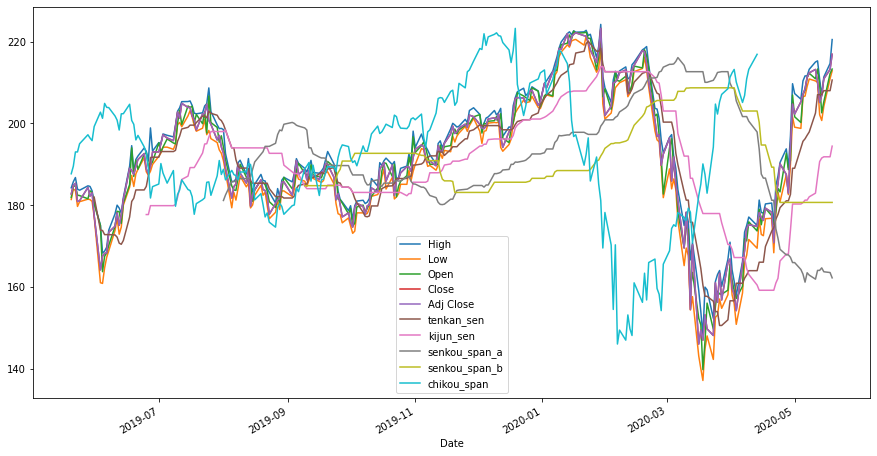

In [18]:
#create a quick plot of the results to see what we have created
d.drop(['Dates','Volume'],axis=1).plot(figsize=(15,8))
plt.show();

In [19]:
#Re-arrange data so that each row contains values of a day:'Date','Open','High','Low','Close'.
#The 'Date' can't be a 'datetime' object as the function wont accept them. That's why converted 'Date' column into integer values using the "date2num" function earlier.
quotes = [tuple(x) for x in d[['Dates','Open','High','Low','Close']].values]

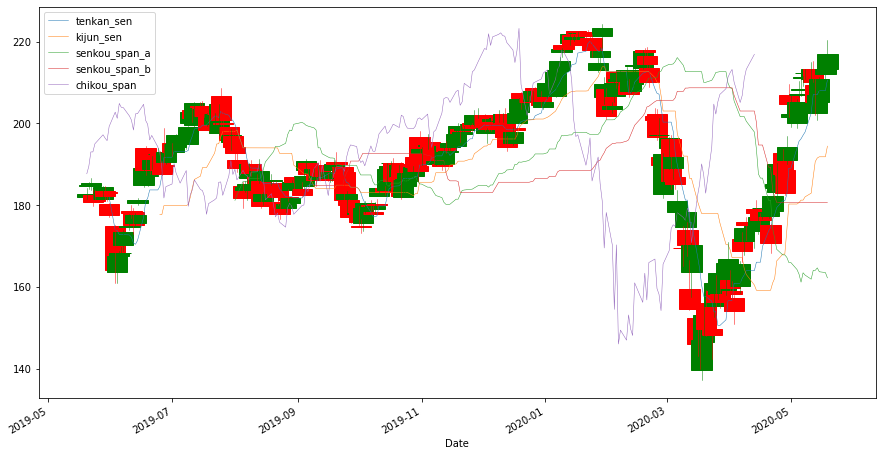

In [20]:
#Plot candlestick, along with Ichimoku elements
fig, ax = plt.subplots(figsize=(15,8))
d[['tenkan_sen','kijun_sen','senkou_span_a','senkou_span_b','chikou_span']].plot(ax=ax,linewidth=0.5)
candlestick_ohlc(ax,quotes,width=10,colorup='g',colordown='r');

#4.Kaufman's Adaptive Moving Average(KAMA): A unique moving average that accounts for volatility and automatically adjusts to price behavior.

In [21]:
#Include this line for NEW WINDOWS(S) for figures
%pylab qt4

Populating the interactive namespace from numpy and matplotlib


In [22]:
#start with getting some data to test on
import datetime
import tradingWithPython as twp #main toolkit functions
import tradingWithPython.lib.yahooFinance as yf #yahoo finance module
import tradingWithPython.lib.backtest as backtest
from tradingWithPython.lib.extra import ProgressBar #import progress bar
#ModuleNotFoundError: No module named 'tradingWithPython'

ModuleNotFoundError: No module named 'tradingWithPython'

#5.Keltner Channels: A chart overlay that shows upper and lower limits for price movements based on the Average True Range of prices.

In [23]:
import pandas as pd

In [89]:
#Keltner Channel
def KELCH(df,n):
    M = (df['High']+df['Low']+df['Close'])/3
    U = (4*df['High']-2*df['Low']+df['Close'])/3
    D = (-2*df['High']+4*df['Low']+df['Close'])/3
    KelChM = pd.Series(M.rolling(n).mean(),name='KelChM_'+ str(n))
    KelChU = pd.Series(U.rolling(n).mean(),name='KelChU_'+ str(n))
    KelChD = pd.Series(D.rolling(n).mean(),name='KelChD_'+ str(n))
    df=df.join(KelChM)
    df=df.join(KelChU)
    df=df.join(KelChD)
    return df

In [82]:
#read the data from the csv file
import os
print (os.path.abspath('.'))
data1 = pd.read_csv('FB.csv')
data1.shape
data1

/Users/jialingshi


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-20,181.880005,184.229996,181.369995,182.720001,182.720001,10352000
1,2019-05-21,184.570007,185.699997,183.889999,184.820007,184.820007,7502800
2,2019-05-22,184.729996,186.740005,183.610001,185.320007,185.320007,9213800
3,2019-05-23,182.419998,183.899994,179.669998,180.869995,180.869995,12768800
4,2019-05-24,182.330002,183.630005,180.830002,181.059998,181.059998,8807700
...,...,...,...,...,...,...,...
248,2020-05-13,209.429993,210.779999,202.110001,205.100006,205.100006,20684600
249,2020-05-14,202.559998,206.929993,200.690002,206.809998,206.809998,17178900
250,2020-05-15,205.270004,211.339996,204.119995,210.880005,210.880005,19383200
251,2020-05-18,212.149994,214.639999,210.940002,213.190002,213.190002,20167400


In [75]:
#define ATR first
def wwma(values,n):
    #J.Welles Wilder's EMA
    return values.ewm(alpha=1/n,adjust=False).mean()

def atr(df,n=14):
    data = df.copy()
    high = data['High']
    low = data['Low']
    close = data['Close']
    data['tr0'] = abs(high - low)
    data['tr1'] = abs(high - close.shift())
    data['tr2'] = abs(low - close.shift())
    tr = data[['tr0','tr1','tr2']].max(axis=1)
    atr = wwma(tr,n)
    return atr

In [91]:
#show data
fb = atr(data1)
fb = KELCH(data1,14)
fb.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,MA,KelChM_14,KelChU_14,KelChD_14
248,2020-05-13,209.429993,210.779999,202.110001,205.100006,205.100006,20684600,210.398001,202.646430,208.738575,196.554286
249,2020-05-14,202.559998,206.929993,200.690002,206.809998,206.809998,17178900,209.508002,203.911192,209.764764,198.057619
250,2020-05-15,205.270004,211.339996,204.119995,210.880005,210.880005,19383200,209.214002,205.284525,211.200955,199.368095
251,2020-05-18,212.149994,214.639999,210.940002,213.190002,213.190002,20167400,209.216003,207.286906,212.993336,201.580476
252,2020-05-19,213.270004,220.490005,212.830002,216.880005,216.880005,31801900,210.572003,208.932144,214.692145,203.172143


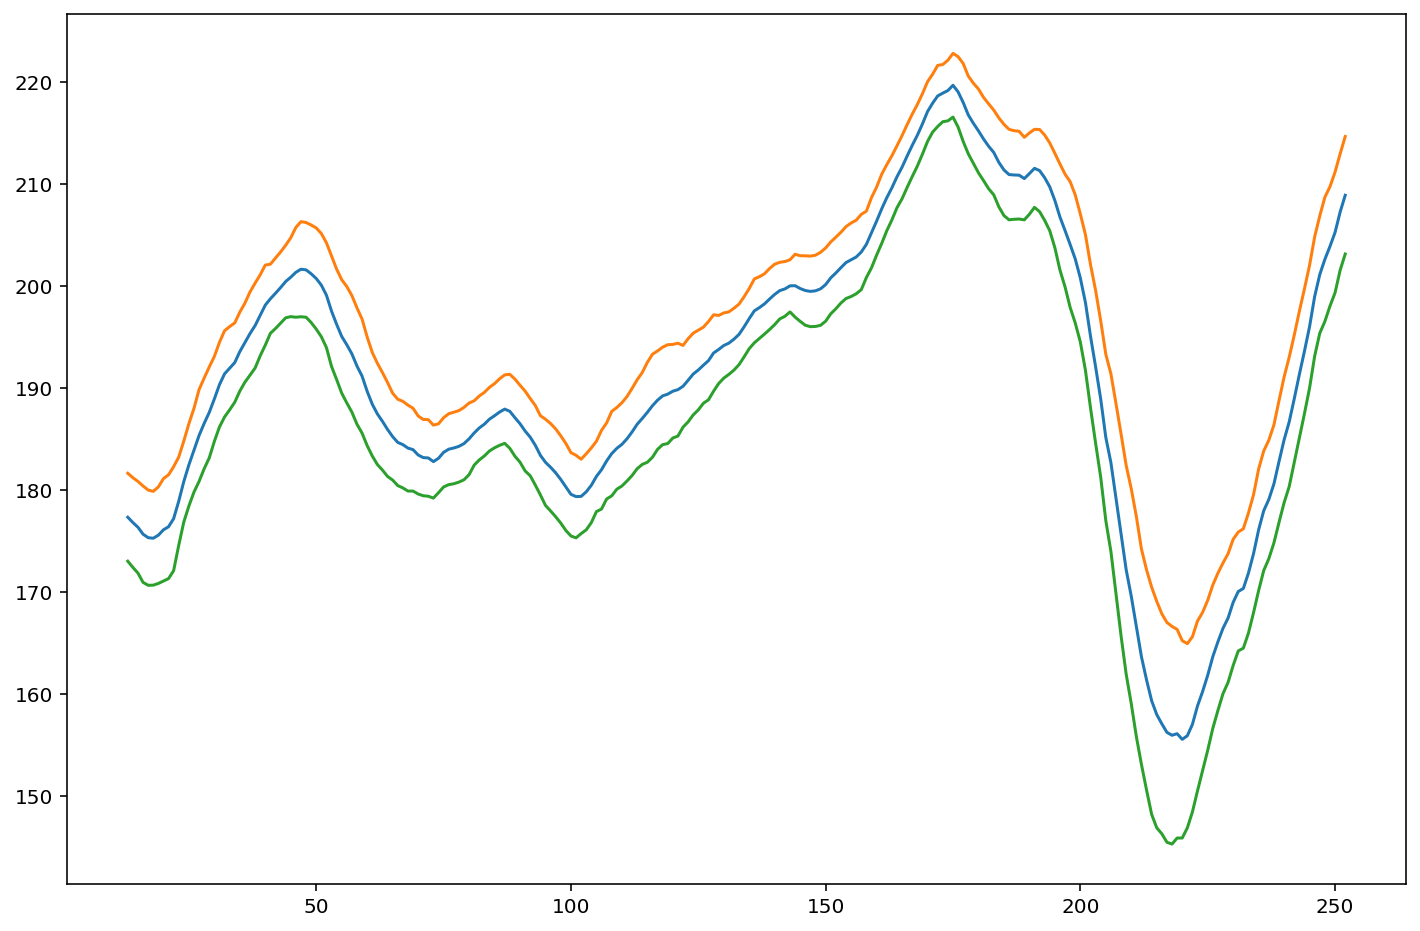

In [92]:
#plot the Keltner Channels
import matplotlib.pyplot as plt
fb['KelChM_14'].plot(figsize=(12,8));
fb['KelChU_14'].plot(figsize=(12,8));
fb['KelChD_14'].plot(figsize=(12,8));
plt.show();

#6.Moving Averages: Chart overlays that show the 'average' value over time. Both Simple Moving Averages(SMAs) and Exponential Moving Averages(EMAs) are explained.

In [86]:
import pandas as pd

In [93]:
df= pd.read_csv('FB.csv')
Close = data1['Close']
data1['MA'] = Close.rolling(window=5).mean()
print(data1['MA'])

0             NaN
1             NaN
2             NaN
3             NaN
4      182.958002
          ...    
248    210.398001
249    209.508002
250    209.214002
251    209.216003
252    210.572003
Name: MA, Length: 253, dtype: float64


#7.Moving Average Envelopes: A chart overlay consisting of a channel formed from simple moving averages. By applying an envelope to the moving average, some of these whipsaw trades can be avoided, and traders can increase their profits.

In [95]:
from __future__ import(absolute_import,division,print_function,unicode_literals)
import sys
from . import Indicator,MovingAverage
#ImportError: attempted relative import with no known parent package

ImportError: attempted relative import with no known parent package

#8.Parabolic SAR: A chart overlay that shows reversal points below prices in an uptrend and above prices in a downtrend. The indicator was developed by the famous technician J.Welles Wilder Jr. and can easily be applied to a trading strategy, enabling a trader to determine where stop orders should be placed.

In [101]:
import pandas as pd
import yfinance as yf

In [100]:
data = yf.download(tickers='fb',start='2019-05-20',end='2020-05-19')
data = data.dropna()
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-05-20,181.880005,184.229996,181.369995,182.720001,182.720001,10352000
2019-05-21,184.570007,185.699997,183.889999,184.820007,184.820007,7502800
2019-05-22,184.729996,186.740005,183.610001,185.320007,185.320007,9213800
2019-05-23,182.419998,183.899994,179.669998,180.869995,180.869995,12768800
2019-05-24,182.330002,183.630005,180.830002,181.059998,181.059998,8807700


In [102]:
import matplotlib.pyplot as plt
plt.style.use('fast')

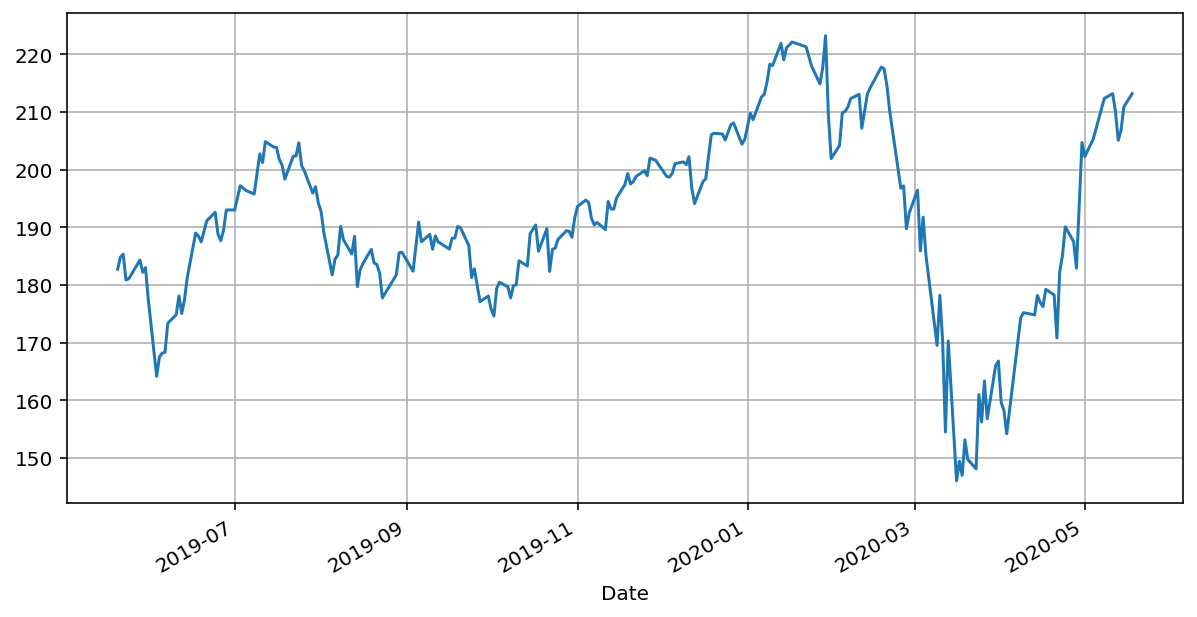

In [103]:
data.Close.plot(figsize=(10,5))
plt.grid()
plt.show();

In [104]:
import talib

In [107]:
#Calculate Parabolic SAR
data['SAR'] = talib.SAR(data.High,data.Low,acceleration=0.02,maximum=0.2)
data['SAR']

Date
2019-05-20           NaN
2019-05-21    181.369995
2019-05-22    181.456595
2019-05-23    186.740005
2019-05-24    186.740005
                 ...    
2020-05-12    207.180069
2020-05-13    215.279999
2020-05-14    215.279999
2020-05-15    214.696399
2020-05-18    200.690002
Name: SAR, Length: 252, dtype: float64

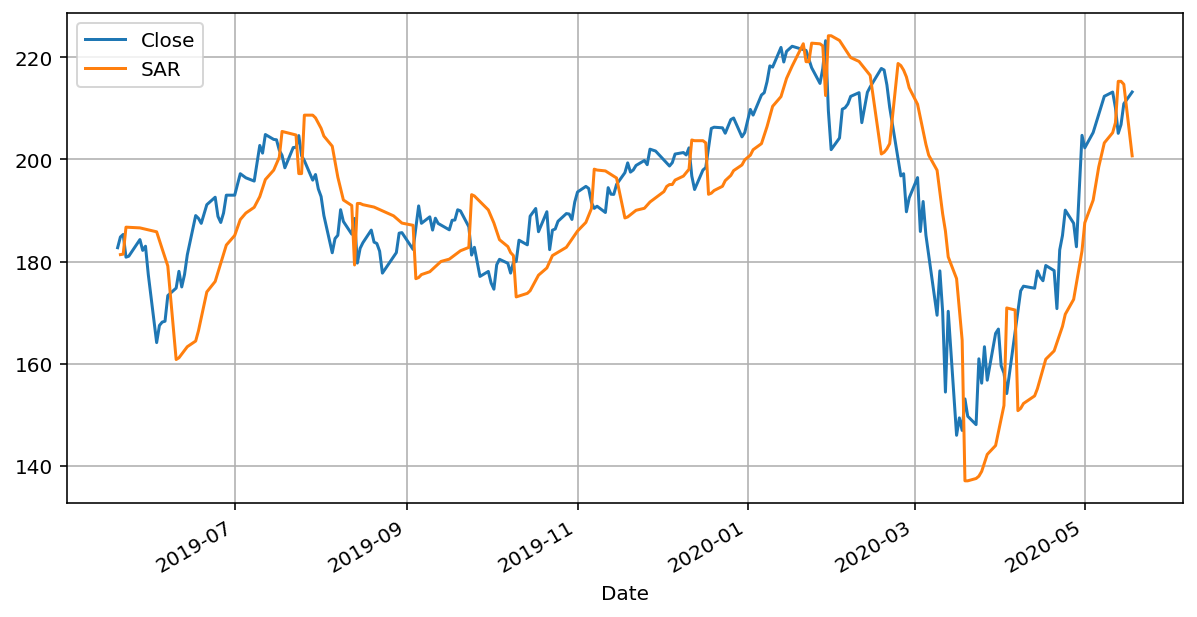

In [108]:
#Plot Parabolic SAR with close price
data[['Close','SAR']][:500].plot(figsize=(10,5))
plt.grid()
plt.show();

In [97]:
def psar(barsdata,iaf=0.02,maxaf=0.2):
    length = len(barsdata)
    dates = list(barsdata['Date'])
    high = list(barsdata['High'])
    low = list(barsdata['Low'])
    close = list(barsdata['Close'])
    psar = close[0:len(close)]
    psarbull = [None]*length
    psarbear = [None]*length
    bull = True
    af = iaf
    ep = low[0]
    hp = high[0]
    lp = low[0]
    
    for i in range(2,length):
        if bull:
            psar[i] = psar[i-1]+af*(hp-psar[i-1])
        else:
            psar[i] = psar[i-1]+af*(lp-psar[i-1])
            
        reverse = False
        
        if bull:
            if low[i] < psar[i]:
                bull = False
                reverse = True
                psar[i] = hp
                lp = low[i]
                af = iaf
        else:
            if high[i] > psar[i]:
                bull = True
                reverse = True
                psar[i] = lp
                hp = high[i]
                af = iaf
                
        if not reverse:
            if bull:
                if high[i] > hp:
                    hp = high[i]
                    af = min(af + iaf, maxaf)
                if low[i-1] < psar[i]:
                    psar[i] = low[i-1]
                if low[i-2] < psar[i]:
                    psar[i] = low[i-2]
            else:
                if low[i] < lp:
                    lp = low[i]
                    af = min(af + iaf, maxaf)
                if high[i-1] > psar[i]:
                    psar[i] = high[i-1]
                if high[i-2] > psar[i]:
                    psar[i] = high[i-2]
        if bull:
            psarbull[i] = psar[i]
        else:
            psarbear[i] = psar[i]
    return {"dates":dates,"high":high,"low":low,"close":close,"psar":psar,"psarbear":psarbear,"psarbull":psarbull}

  if __name__ == "__main__":
    import sys
    import os
    
    if len(sys.argv) < 2:
        sys.exit("Usage:%s datafile.csv"% sys.argv[0])
    if not os.path.exists(sys.argv[1]):
        sys.exit("Error:can't open file '%s':No such file"% sys.argv[1])
    

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 62)

#9.Pivot Points: A chart overlay that shows reversal points below prices in an uptrend and above prices in a downtrend. When the price of an asset is trading above the pivot point, it indicates the day is bullish or positive. When the price of an asset is trading below the pivot point, it indicates the day is bearish or negative. (Pivot Points, Supports and Resistances )

In [109]:
def PPSR(df):  
    PP = pd.Series((df['High'] + df['Low'] + df['Close']) / 3)  
    R1 = pd.Series(2 * PP - df['Low'])  
    S1 = pd.Series(2 * PP - df['High'])  
    R2 = pd.Series(PP + df['High'] - df['Low'])  
    S2 = pd.Series(PP - df['High'] + df['Low'])  
    R3 = pd.Series(df['High'] + 2 * (PP - df['Low']))  
    S3 = pd.Series(df['Low'] - 2 * (df['High'] - PP))  
    psr = {'PP':PP, 'R1':R1, 'S1':S1, 'R2':R2, 'S2':S2, 'R3':R3, 'S3':S3}  
    PSR = pd.DataFrame(psr)  
    df = df.join(PSR)  
    return df

In [110]:
PPSR(data1)

,Date,Open,High,Low,Close,Adj Close,Volume,MA,PP,R1,S1,R2,S2,R3,S3
0,2019-05-20,181.880005,184.229996,181.369995,182.720001,182.720001,10352000,NaN,182.773331,184.176666,181.316665,185.633332,179.913330,187.036667,178.456664
1,2019-05-21,184.570007,185.699997,183.889999,184.820007,184.820007,7502800,NaN,184.803334,185.716670,183.906672,186.613332,182.993336,187.526668,182.096674
2,2019-05-22,184.729996,186.740005,183.610001,185.320007,185.320007,9213800,NaN,185.223338,186.836674,183.706670,188.353342,182.093334,189.966678,180.576666
3,2019-05-23,182.419998,183.899994,179.669998,180.869995,180.869995,12768800,NaN,181.479996,183.289993,179.059997,185.709992,177.250000,187.519989,174.830001
4,2019-05-24,182.330002,183.630005,180.830002,181.059998,181.059998,8807700,182.958002,181.840002,182.850001,180.049998,184.640005,179.039999,185.650004,177.249995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,2020-05-13,209.429993,210.779999,202.110001,205.100006,205.100006,20684600,210.398001,205.996669,209.883336,201.213338,214.666667,197.326671,218.553334,192.543340
249,2020-05-14,202.559998,206.929993,200.690002,206.809998,206.809998,17178900,209.508002,204.809998,208.929993,202.690002,211.049989,198.570007,215.169984,196.450011
250,2020-05-15,205.270004,211.339996,204.119995,210.880005,210.880005,19383200,209.214002,208.779999,213.440002,206.220001,216.000000,201.559998,220.660003,199.000000
251,2020-05-18,212.149994,214.639999,210.940002,213.190002,213.190002,20167400,209.216003,212.923334,214.906667,211.206670,216.623331,209.223337,218.606664,207.506673


In [29]:
from __future__ import(absolute_import,division,print_function,unicode_literals)
from. import Indicator, CmpEx

ImportError: attempted relative import with no known parent package

#10.Price Channels: A price channel occurs when a security's price oscillates between two paraller lines, whether they be horizontal, ascending, or descending. It is often used by traders, who practice the art of technical analysis, to gauge the momentum and direction of a security's price action.

In [111]:
import pandas as pd
import  pandas_datareader as web
import matplotlib.pyplot as plt
%matplotlib inline

In [112]:
def get_high(stock,strat,end):
    return web.get_data_yahoo(stock,start,end)['High']

In [113]:
def get_low(stock,strat,end):
    return web.get_data_yahoo(stock,start,end)['Low']

In [114]:
def get_close(stock,strat,end):
    return web.get_data_yahoo(stock,start,end)['Adj Close']

In [115]:
x = pd.DataFrame(get_high('FB','5/20/2019','5/19/2020'))

In [116]:
x['Low'] = pd.DataFrame(get_low('FB','5/20/2019','5/19/2020'))

In [117]:
x['Close'] = pd.DataFrame(get_close('FB','5/20/2019','5/19/2020'))

In [118]:
x['4WH'] = x['High'].rolling(window=20).max()

In [119]:
x['4WL'] = x['Low'].rolling(window=20).min()

In [120]:
x['50 sma'] = x['Close'].rolling(window=50).mean()

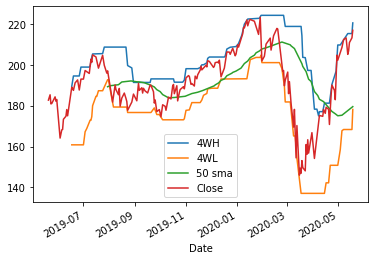

In [121]:
x.plot(y=['4WH','4WL','50 sma', 'Close']);

#11.Price by Volume Chart(PBV): A price by volume(PBV) chart is a horizontal histogram plotted on a security's chart, showing the volume of shares traded at a specific price level. Often times, price by volume histograms are found on the Y-axis and are used by technical traders to predict areas of support and resistance.

In [122]:
import quandl
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np
import argparse

In [136]:
def parse_args():
    parser = argparse.ArgumentParser(description='Volume at Price Chart')
    
    parser.add_argument('qcode',help='The Quandle code,including database\prefix e.g. WIKI/F of the instrument being tested')
    
    parser.add_argument('start',help='Starting date in YYYY-MM-DD format')
    
    parser.add_argument('end',help='Ending date in YYYY-MM-DD format')
    
    parser.add_argument('round',type=int,help='Round to the Nearest')
    
    return parser.parse_args()

In [124]:
def get_quandl_data(ticker,start,end):
    data = quandl.get(ticker, start_date=start,end_date=end)
    return data

In [125]:
def custom_round(x,base=5):
    return int(base*round(float(x)/base))

In [126]:
def round_and_group(df,base=5):
    #Extract the data we want
    df = data[['Close','Volume']].copy()
    #Round to nearest X
    df['Close'] = df['Close'].apply(lambda x:custom_round(x,base=base))
    #Remove the date index
    df = df.set_index('Close')
    df = df.groupby(['Close']).sum()
    return df

In [127]:
def thousands(x,pos):
    #'The two args are the value and tick position'
    return '%1.0fK'%(x*1e-3)

In [128]:
def create_plot(x_series, x_label, y_pos, y_tixk_labels, colour, title):
    plt.rcdefaults()
    fig,ax = plt.subplots()
    
    ax.barh(y_pos,x_series,aligh='center',color=colour)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(y_tick_labels)
    formatter = FuncFormatter(thousands)
    ax.xaxis.set_major_formatter(formatter)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    plt.xticks(rotation=325)
    plt.show();

In [134]:
#Setup api
quandl_api = "-3SjK5MsLnRy81trD7Aq"
quandl.ApiConfig.api_key = quandl_api

In [137]:
#Get Fbs
fbs = parse_args()

print("VOLUME AT PRICE")
print("QCODE:{}".format(args.qcode))
print("START:{}".format(args.start))
print("END:{}".format(args.end))
#I'm not really understanding "argparse" and the following part. So I'm not sure what's wrong with the error "An exception has occurred, use %tb to see the full traceback.
#SystemExit: 2

usage: ipykernel_launcher.py [-h] qcode start end round
ipykernel_launcher.py: error: the following arguments are required: start, end, round


SystemExit: 2

In [133]:
#Get data
data = get_quandl_data(fb,start,end)
#

InvalidRequestError: Your dataset must either be specified as a string that contains a         single Quandl code or an array of Quandl codes

#12.Volume-Weighted Average Price(VWAP): The volume weighted average price(VWAP) is a trading benchmark used by traders that gives the average price a security has traded at throughout the day, based on both volume and price. It is important because it provides traders with insight into both the trend and value of a security.

In [91]:
from clr import AddReference
AddReference("System")
AddReference("QuantConnect.Common")
AddReference("QuantConnect.Indicators")
AddReference("QuantConnect.Algorithm")
AddReference("QuantConnect.Algorithm.Framework")
#ImportError: cannot import name 'AddReference' from 'clr'

ImportError: cannot import name 'AddReference' from 'clr' (/Users/jialingshi/opt/anaconda3/lib/python3.7/site-packages/clr/__init__.py)

#13.ZigZag: The zig zag indicator is a basic tool that analysts use to find out when a security's trend is reversing. By determining the support and resistance areas, it helps to identify significant changes in price while filtering out short-term fluctuations, thus eliminating the noise of everyday market conditions.

In [140]:
import pandas as pd
import numpy as np
import talib
import matplotlib.pyplot as plt

In [144]:
dfPrices = data1

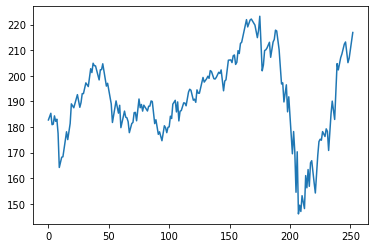

In [145]:
plt.plot(dfPrices.index,dfPrices['Adj Close'])

In [146]:
dfReturns = dfPrices['Adj Close'] - dfPrices['Adj Close'].shift(1)

In [147]:
dfReturnsPrc = dfReturns/dfPrices['Adj Close'].shift(1)*100

In [148]:
dfReturnsPrc.describe()

count    252.000000
mean       0.098988
std        2.478043
min      -14.252997
25%       -0.971779
50%        0.217445
75%        1.348178
max       10.234996
Name: Adj Close, dtype: float64

In [149]:
def createZigZagPoints(dfSeries, minSegSize=2,sizeInDevs=1):
    minRetrace = minSegSize
    
    curVal = dfSeries[0]
    curPos = dfSeries.index[0]
    curDir = 1
    #dfRes = pd.DataFrame(np.zeros((len(dfSeries.index),2)),index=dfSeries.index,columns=["Dir","Value"])
    dfRes = pd.DataFrame(index=df.Series.index,columns=["Dir","Value"])
    #print(dfRes)
    #print(len(dfSeries.index))
    for ln in dfSeries.index:
        if((dfSeries[ln]-curVal)*curDir>=0):
            curVal = dfSeries[ln]
            curPos = ln
            #print(str(ln)+":moving curVal further,to"+str(curVal))
        else:
            retracePrc = abs((dfSeries[ln]-curVal)/curVal*100)
            #print(str(ln+":estimating retracePrc,it's"+str(retracePrc)))
            if(retracePrc>=minRetrace):
                #print(str(ln)+":registering key point,its pos is"+str(curPos)+",value="+str(curVal)+",dir="+str(curDir))
                dfRes.ix[curPos,'Value'] = curVal
                dfRes.ix[curPos,'Dir'] = curDir
                curVal = dfSeries[ln]
                curPos = ln
                curDir = -1*curDir
                #print(str(ln) + ": setting new cur vals, pos is " + str(curPos) + ", curVal = " + str(curVal) + ",dir=" +str(curDir))
            #print(ln, curVal, curDir)
        dfRes[['Value']] = dfRes[['Value']].astype(float)
        dfRes = dfRes.interpolate(method='linear')
        return(dfRes)

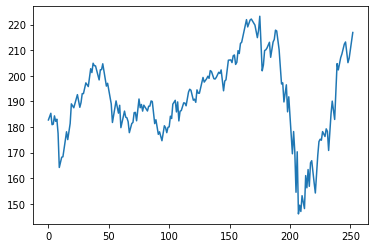

In [151]:
plt.plot(dfPrices['Adj Close']);

#Oscillators:
#1.Accumulation/Distribution Line: Accumulation/distribution is a cumulative indicator that uses volume and price to assess whether a stock is being accumulated or distributed. The accumulation/distribution measure seeks to identify divergences between the stock price and volume flow. This provides insight into how strong a trend is.

In [154]:
def ACCDIST(df, n):  
    ad = (2 * df['Close'] - df['High'] - df['Low']) / (df['High'] - df['Low']) * df['Volume']  
    M = ad.diff(n - 1)  
    N = ad.shift(n - 1)  
    ROC = M / N  
    AD = pd.Series(ROC, name = 'Acc/Dist_ROC_' + str(n))  
    df = df.join(AD)  
    return df

In [155]:
ACCDIST(data1,21)

,Date,Open,High,Low,Close,Adj Close,Volume,MA,Acc/Dist_ROC_21
0,2019-05-20,181.880005,184.229996,181.369995,182.720001,182.720001,10352000,NaN,NaN
1,2019-05-21,184.570007,185.699997,183.889999,184.820007,184.820007,7502800,NaN,NaN
2,2019-05-22,184.729996,186.740005,183.610001,185.320007,185.320007,9213800,NaN,NaN
3,2019-05-23,182.419998,183.899994,179.669998,180.869995,180.869995,12768800,NaN,NaN
4,2019-05-24,182.330002,183.630005,180.830002,181.059998,181.059998,8807700,182.958002,NaN
...,...,...,...,...,...,...,...,...,...
248,2020-05-13,209.429993,210.779999,202.110001,205.100006,205.100006,20684600,210.398001,-1.675092
249,2020-05-14,202.559998,206.929993,200.690002,206.809998,206.809998,17178900,209.508002,0.999328
250,2020-05-15,205.270004,211.339996,204.119995,210.880005,210.880005,19383200,209.214002,0.895473
251,2020-05-18,212.149994,214.639999,210.940002,213.190002,213.190002,20167400,209.216003,-2.277940


#2.Aroon: The Aroon indicator is a technical indicator that is used to identify trend changes in the price of an asset, as well as the strength of that trend. In essence, the indicator measures the time between highs and the time between lows over a time period.

In [161]:
from __future__ import division

from functools import wraps

import numpy as np
from pandas import DataFrame, Series
from pandas.stats import moments
#ModuleNotFoundError: No module named 'pandas.stats'

ModuleNotFoundError: No module named 'pandas.stats'

In [156]:
def aroon(s, n=25):
    up = 100 * moments.rolling_apply(s.high, n + 1, lambda x: x.argmax()) / n
    dn = 100 * moments.rolling_apply(s.low, n + 1, lambda x: x.argmin()) / n

    return DataFrame(dict(up=up, down=dn))

In [157]:
aroon(data1)

NameError: name 'moments' is not defined

#3.Aroon Oscillator: The Aroon Oscillator is a trend-following indicator that uses aspects of the Aroon Indicator(Aroon Up and Aroon Down) to gauge the strength of a current trend and the likelihood that it will continue. Readings above zero indicate that an uptrend is present, while readings below zero indicate that a downtrend is present.
#Aroon Oscillator = Aroon Up - Aroon Down

#4.Average Directional Index(ADX): The average directional index(ADX) is a technical analysis indicator used by some traders to determine the strength of a trend. The trend can be either up or down, and this is shown by two accompanying indicators, the Negative Directional Indicator (-DI) and the Positive Directional Indicator(+DI).

In [168]:
def ADX(df, n, n_ADX):
    i = 0
    UpI = []
    DoI = []
    while i + 1 <= df.index[-1]:  
        UpMove = df.at[i + 1, 'High'] - df.at[i, 'High']  
        DoMove = df.at[i, 'Low'] - df.at[i + 1, 'Low'] 
        if UpMove > DoMove and UpMove > 0:  
            UpD = UpMove  
        else: UpD = 0  
        UpI.append(UpD)  
        if DoMove > UpMove and DoMove > 0:  
            DoD = DoMove  
        else: DoD = 0  
        DoI.append(DoD)  
        i = i + 1  
    i = 0  
    TR_l = [0]  
    while i < df.index[-1]:  
        TR = max(df.at[i + 1, 'High'], df.at[i, 'Close']) - min(df.at[i + 1, 'Low'], df.at[i, 'Close'])  
        TR_l.append(TR)  
        i = i + 1  
    TR_s = pd.Series(TR_l)  
    ATR = pd.Series(TR_s.ewma(span = n, min_periods = n))  
    UpI = pd.Series(UpI)  
    DoI = pd.Series(DoI)  
    PosDI = pd.Series(UpI.ewma(span = n, min_periods = n - 1) / ATR)  
    NegDI = pd.Series(DoI.ewma(span = n, min_periods = n - 1) / ATR) 
    formula = abs(PosDI - NegDI) / (PosDI + NegDI)
    ADX = pd.Series(formula.ewma(span = n_ADX, min_periods = n_ADX - 1), name = 'ADX_' + str(n) + '_' + str(n_ADX))  
    df = df.join(ADX)  
    return df

In [173]:
ADX(data1,14,21)

AttributeError: 'Series' object has no attribute 'ewma'

#5.Average True Range(ATR): The average true range(ATR) is a technical analysis indicator that measures market volatility by decomposing the entire range of an asset price for the period.

In [160]:
#According to the code of ATR in Keltner Channels
atr(data1)

0      2.860001
1      2.868572
2      2.887246
3      3.084586
4      3.064259
         ...   
248    7.217899
249    7.148049
250    7.153188
251    6.910817
252    6.964330
Length: 253, dtype: float64

#6.BandWidth: BandWidth measures the percentage difference between the upper band and the lower band. BandWidth decreases as Bollinger Bands narrow and increases as Bollinger Bands widen.

In [170]:
from __future__ import absolute_import
import numpy as np
from pyti import catch_errors
from pyti.function_helper import fill_for_noncomputable_vals
from pyti.simple_moving_average import(simple_moving_average as sma)
from six.moves import range

In [199]:
def upper_bollinger_band(data,period,std):
    data['30 Day MA'] = data['Adj Close'].rolling(window=20).mean()
    data['30 Day STD'] = data['Adj Close'].rolling(window=20).std()
    return data['30 Day MA'] + (data['30 Day STD']*2)

In [198]:
def lower_bollinger_band(data,period,std):
    data['30 Day MA'] = data['Adj Close'].rolling(window=20).mean()
    data['30 Day STD'] = data['Adj Close'].rolling(window=20).std()
    return data['30 Day MA'] - (data['30 Day STD']*2)

In [197]:
def middle_bollinger_band(data,period,std):
    data['30 Day MA']= data['Adj Close'].rolling(window=20).mean()
    return data['30 Day MA']

In [200]:
def bandwidth(data,period=20,std=2.0):
    #Bandwidth.Formula:bw=u_bb - l_bb/m_bb
    catch_errors.check_for_period_error(data,period)
    
    period = int(period)
    bandwidth = ((upper_bollinger_band(data,period,std)-lower_bollinger_band(data,period,std))/middle_bollinger_band(data,period,std))
    
    return bandwidth

In [202]:
bandwidth(data1,20)

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
248    0.287959
249    0.274937
250    0.266272
251    0.253768
252    0.220829
Length: 253, dtype: float64

#7.%B Indicator: Shows the relationship between price and standard deviation Bollinger Bands.

In [203]:
from __future__ import absolute_import
import numpy as np
from pyti import catch_errors
from pyti.function_helper import fill_for_noncomputable_vals
from pyti.simple_moving_average import(simple_moving_average as sma)
from six.moves import range

In [214]:
def percent_b(data,period,std=2.0):
    #%B.Formula:%B=((data-lb)/(ub-lb))*100
    lb = lower_bollinger_band(data,period,std)
    ub = upper_bollinger_band(data,period,std)
    percent_b = ((data1['Adj Close']-lb)/(ub-lb))*100
    return percent_b

In [215]:
percent_b(data1,20)

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
         ...    
248    67.390336
249    68.408890
250    73.565312
251    75.617959
252    82.203891
Length: 253, dtype: float64

#8.Chaikin Money Flow(CMF): Combines price and volume to show how money may be flowing into or out of a stock. Alternative to Accumulation/Distribution Line.

In [216]:
from __future__ import absolute_import
import numpy as np
from pyti import catch_errors
from pyti.function_helper import fill_for_noncomputable_vals
from six.moves import range

In [217]:
def chaikin_money_flow(close_data,high_data,low_data,volume,period):
    #Chaikin Money Flow. Formula:CMF=SUM[(((Cn-Ln)-(Hn-Cn))/(Hn-Ln))*V]/SUM(Vn)
    catch_errors.check_for_input_len_diff(close_data,high_data,low_data,volume)
    catch_errors.check_for_period_error(close_data,period)
    
    close_data = np.array(close_data)
    high_data = np.array(high_data)
    low_data = np.array(low_data)
    volume = np.array(volume)
    cmf = [sum((((close_data[idx+1-period:idx+1] - low_data[idx+1-period:idx+1]) -
          (high_data[idx+1-period:idx+1] - close_data[idx+1-period:idx+1])) /
          (high_data[idx+1-period:idx+1] - low_data[idx+1-period:idx+1])) *
          volume[idx+1-period:idx+1]) / sum(volume[idx+1-period:idx+1]) for idx in range(period-1, len(close_data))]
    cmf = fill_for_noncomputable_vals(close_data,cmf)
    return cmf

In [218]:
chaikin_money_flow(data1['Close'],data1['High'],data1['Low'],data1['Volume'],1)

array([-5.59401902e-02,  2.76342847e-02,  9.26541947e-02, -4.32624995e-01,
       -8.35717319e-01,  7.54596458e-01, -4.76636702e-01,  6.37064444e-01,
       -8.16569226e-01, -5.52706950e-01,  7.90322934e-01,  7.31049615e-01,
       -1.09307243e-01,  7.93244889e-01, -4.97534728e-01, -1.78676008e-01,
       -3.23947312e-01,  6.72515598e-01,  4.45657491e-01,  8.07463503e-01,
       -6.71723586e-01,  6.50698887e-01,  7.38621110e-02,  4.70768615e-01,
       -1.45225144e-01, -7.16570120e-01, -7.97097795e-01, -7.68144037e-01,
        8.77302266e-01, -3.61190995e-01,  1.00000000e+00,  8.76544681e-01,
        5.37923503e-01,  3.94736963e-01,  8.90591001e-01,  8.60176066e-01,
       -4.31760370e-01,  8.59932225e-01,  1.90883178e-01, -3.75534548e-01,
       -8.48370671e-01, -9.38538432e-02, -8.63852422e-01,  8.67021595e-01,
       -1.46344601e-01,  9.60475874e-01, -5.28844254e-01,  5.58061419e-02,
       -7.04388589e-01,  3.58920631e-01, -4.90130760e-01, -5.12518584e-01,
       -5.82417800e-01, -

#9.Chaikin Oscillator: Combines price and volume to show how money may be flowing into or out of a stock. Based on Accumulation/Distribution Line.

In [224]:
def chaikin_oscillator(data, periods_short=3, periods_long=10, high_col='High',low_col='Low', close_col='Close', vol_col='Volume'):
    ac = pd.Series([])
    val_last = 0
    
    for index, row in data.iterrows():
        if row[high_col] != row[low_col]:
            val = val_last+((row[close_col]-row[low_col])-(row[high_col]-row[close_col]))/(row[high_col]-row[low_col])*row[vol_col]
    
        else:
            val = val_last
        ac.at[index, val]
            
    ema_long = ac.ewm(ignore_na=False, min_periods=0, com=periods_long,adjust=True).mean()
    ema_short = ac.ewm(ignore_na=False, min_periods=0, com=periods_short,adjust=True).mean()
    data['ch_osc'] = ema_short - ema_long

    return data

In [230]:
chaikin_oscillator(data1)

/Users/jialingshi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


TypeError: _get_value() got multiple values for argument 'takeable'

#10.Chande Momentum Oscillator: The formula calculates the difference between the sum of recent gains and the sum of recent losses and then divides the result by the sum of all price movement over the same period.

In [231]:
from __future__ import absolute_import
import numpy as np
import warnings
from pyti import catch_errors
from six.moves import range

In [232]:
def chande_momentum_oscillator(close_data,period):
    #Chande Momentum Oscillator.Formula:cmo=100*((sum_up-sum_down)/(sum_up+sum_down))
    catch_errors.check_for_period_error(close_data,period)
    
    close_data = np.array(close_data)
    
    moving_period_diffs = [[(close_data[idx+1-period:idx+1][i]-close_data[idx+1-period:idx+1][i-1])for i in range(1,len(close_data[idx+1-period:idx+1]))]for idx in range(0,len(close_data))]
    
    sum_up = []
    sum_down = []
    for period_diffs in moving_period_diffs:
        ups = [val if val>0 else 0 for val in period_diffs]
        sum_up.append(sum(ups))
        downs = [abs(val) if val<0 else 0 for val in period_diffs]
        sum_down.append(sum(downs))
        
    sum_up = np.array(sum_up)
    sum_down = np.array(sum_down)
    #numpy is able to handle dividing by zero and makes those calculations
    #nans which is what we want, so we safely suppress the Runtime Warning
    with warnings.catch_warnings():
        warnings.simplefilter("ignore",category=RuntimeWarning)
        cmo = 100*((sum_up-sum_down)/(sum_up+sum_down))
    return cmo

In [234]:
chande_momentum_oscillator(data1['Close'],14)

array([         nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan, -22.58373055, -24.47380224, -16.54445048,
       -13.79881542,  -8.06921813,  -6.60752642,  13.46227827,
        10.83764116,  21.84156184,  73.43745284,  72.02919693,
        72.68665498,  55.11951909,  42.88278948,  43.50914008,
        43.87510114,  58.12298307,  57.53199352,  55.0850283 ,
        33.6981151 ,  33.09119396,  47.89710861,  50.84743628,
        39.03286286,  43.77449273,  59.73056338,  67.08124388,
        50.57568895,  35.6227142 ,  22.09399236,  27.9176479 ,
        21.44640423,  32.31616312,  17.14587125,   2.04697963,
       -25.459297  , -15.94977067, -41.82391681, -43.0331398 ,
       -50.03376775, -57.55666727, -44.41716746, -37.90533834,
       -33.87187937, -38.01413513, -50.29988391, -32.71079529,
       -44.27749716, -30.11506929, -30.08569509, -18.31

#11.Commodity Channel Index(CCI): The Commodity Channel Index(CCI) is a momentum_based oscillator used to help determine when an investment vehicle is reaching a condition of being overbought or oversold. It is also used to assess price trend direction and strength.

In [235]:
from __future__ import absolute_import
import numpy as np
from pyti import catch_errors
from pyti.typical_price import typical_price
from pyti.simple_moving_average import (simple_moving_average as sma)

In [236]:
def commodity_channel_index(close_data,high_data,low_data,period):
    #Commodity Channel Index.Formula:CCI=(TP-SMA(TP))/(0.015*Mean Deviation)
    catch_errors.check_for_input_len_diff(close_data,high_data,low_data)
    catch_errors.check_for_period_error(close_data,period)
    tp = typical_price(close_data,high_data,low_data)
    cci = ((tp-sma(tp,period))/(0.015*np.mean(np.absolute(tp-np.mean(tp)))))
    return cci

In [237]:
commodity_channel_index(data1['Close'],data1['High'],data1['Low'],20)

array([          nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,   51.59762879,
         62.65319109,   44.2284403 ,   57.5879768 ,   61.45000237,
         69.62163784,   53.69327836,   44.40409399,   61.09956715,
         56.58251688,   56.70608954,   53.52026966,   56.50041378,
         47.25096438,   38.31574703,   45.60024702,   60.2106231 ,
         53.10890658,   53.33664897,   50.39799181,   48.41266871,
         36.87776706,   24.08672616,   14.56803938,   20.48158504,
         24.70024944,   19.93514619,   17.89599784,    0.48551514,
        -14.95642544,  -18.61456043,  -25.1963718 ,  -30.94480964,
        -51.20127097,  -88.28210243,  -72.99552606,  -69.49805838,
        -45.05556616,  -38.75450572,  -49.07914843,  -31.17609

#12.Coppock Curve: The Coppock Curve is a long-term price momentum indicator used primarily to recognize major bottoms in the stock market.It is calculated as a 10-month weighted moving average of the sum of the 14-month rate of change and the 11-month rate of change for the index;it is also known as the "Coppock Guide."

In [238]:
#Import Built-Ins
import logging

In [239]:
#Import Third-Party
import pandas as pd
import numpy as np

In [240]:
#Import Homebrew
#Init Logging Facilities
log = logging.getLogger(__name__)

In [241]:
def coppock_curve(df,n):
    #Calculate Coppock Curve for given data. param df:pandas.DataFrame;param n:;return:pandas.DataFrame
    M = df['Close'].diff(int(n * 11 / 10) - 1)
    N = df['Close'].shift(int(n * 11 / 10) - 1)
    ROC1 = M / N
    M = df['Close'].diff(int(n * 14 / 10) - 1)
    N = df['Close'].shift(int(n * 14 / 10) - 1)
    ROC2 = M / N
    Copp = pd.Series((ROC1 + ROC2).ewm(span=n, min_periods=n).mean(), name='Copp_' + str(n))
    df = df.join(Copp)
    return df

In [242]:
coppock_curve(data1,14)

,Date,Open,High,Low,Close,Adj Close,Volume,MA,30 Day MA,30 Day STD,Copp_14
0,2019-05-20,181.880005,184.229996,181.369995,182.720001,182.720001,10352000,NaN,NaN,NaN,NaN
1,2019-05-21,184.570007,185.699997,183.889999,184.820007,184.820007,7502800,NaN,NaN,NaN,NaN
2,2019-05-22,184.729996,186.740005,183.610001,185.320007,185.320007,9213800,NaN,NaN,NaN,NaN
3,2019-05-23,182.419998,183.899994,179.669998,180.869995,180.869995,12768800,NaN,NaN,NaN,NaN
4,2019-05-24,182.330002,183.630005,180.830002,181.059998,181.059998,8807700,182.958002,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
248,2020-05-13,209.429993,210.779999,202.110001,205.100006,205.100006,20684600,210.398001,195.319002,14.060975,0.334282
249,2020-05-14,202.559998,206.929993,200.690002,206.809998,206.809998,17178900,209.508002,196.847002,13.530142,0.322826
250,2020-05-15,205.270004,211.339996,204.119995,210.880005,210.880005,19383200,209.214002,198.429002,13.209036,0.327696
251,2020-05-18,212.149994,214.639999,210.940002,213.190002,213.190002,20167400,209.216003,200.176502,12.699587,0.328686


#13.Correlation Coefficient: Shows the degree of correlation between two securities over a given timeframe.
#Method of correlation:
#pearson : standard correlation coefficient
#kendall : Kendall Tau correlation coefficient
#spearman : Spearman rank correlation
#callable: callable with input two 1d ndarrays
#and returning a float. Note that the returned matrix from corr will have 1 along the diagonals and will be
symmetric regardless of the callable’s behavior.

In [246]:
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
import numpy as np

In [244]:
tickers = ['AAPL', 'FB', 'C', 'DIS']

In [247]:
data = pdr.get_data_yahoo(tickers, start = '2019-05-20', end = '2020-05-19')['Adj Close']

In [249]:
corrs = data.corr()
corrs

Symbols,AAPL,FB,C,DIS
Symbols,,,,
AAPL,1.000000,0.540078,0.081395,-0.124967
FB,0.540078,1.000000,0.624747,0.589111
C,0.081395,0.624747,1.000000,0.925371
DIS,-0.124967,0.589111,0.925371,1.000000


#14.DecisionPoint Price Momentum Oscillator(PMO): An oscillator based on a Rate of Change(ROC) calculation that is smoothed twice with exponential moving averages that use a custom smoothing process. Because the PMO is normalized, it can also be used as a relative strength tool. Stocks can thus be ranked by their PMO value as an expression of relative strength.

In [196]:
study(title="DecisionPoint Price Momentum Oscillator [LazyBear]", shorttitle="DPMO_LB")
#NameError: name 'study' is not defined

NameError: name 'study' is not defined

In [197]:
src=input(close, title="Source")
#

TypeError: raw_input() got an unexpected keyword argument 'title'

#15.Detrended Price Oscillator(DPO): A price oscillator that uses a displaced moving average to identify cycles.

In [257]:
from __future__ import absolute_import
import numpy as np
from pyti import catch_errors
from pyti.function_helper import fill_for_noncomputable_vals
from six.moves import range

In [258]:
def detrended_price_oscillator(data, period):
    #Detrended Price Oscillator.Formula:DPO = DATA[i] - Avg(DATA[period/2 + 1])
    catch_errors.check_for_period_error(data, period)
    period = int(period)
    dop = [data[idx] - np.mean(data[idx+1-(int(period/2)+1):idx+1]) for idx in range(period-1, len(data))]
    dop = fill_for_noncomputable_vals(data, dop)
    return dop

In [259]:
detrended_price_oscillator(data1, 14)

KeyError: 13

#16.Ease of Movement(EMV): An indicator that compares volume and price to identify significant moves.

In [262]:
def EOM(df, n):  
    EoM = (df['High'].diff(1) + df['Low'].diff(1)) * (df['High'] - df['Low']) / (2 * df['Volume'])  
    Eom_ma = pd.Series(EoM.rolling(n).mean(), name = 'EoM_' + str(n))  
    df = df.join(Eom_ma)  
    return df

In [263]:
EOM(data1,14)

,Date,Open,High,Low,Close,Adj Close,Volume,MA,30 Day MA,30 Day STD,EoM_14
0,2019-05-20,181.880005,184.229996,181.369995,182.720001,182.720001,10352000,NaN,NaN,NaN,NaN
1,2019-05-21,184.570007,185.699997,183.889999,184.820007,184.820007,7502800,NaN,NaN,NaN,NaN
2,2019-05-22,184.729996,186.740005,183.610001,185.320007,185.320007,9213800,NaN,NaN,NaN,NaN
3,2019-05-23,182.419998,183.899994,179.669998,180.869995,180.869995,12768800,NaN,NaN,NaN,NaN
4,2019-05-24,182.330002,183.630005,180.830002,181.059998,181.059998,8807700,182.958002,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
248,2020-05-13,209.429993,210.779999,202.110001,205.100006,205.100006,20684600,210.398001,195.319002,14.060975,1.101061e-07
249,2020-05-14,202.559998,206.929993,200.690002,206.809998,206.809998,17178900,209.508002,196.847002,13.530142,2.941395e-08
250,2020-05-15,205.270004,211.339996,204.119995,210.880005,210.880005,19383200,209.214002,198.429002,13.209036,5.678101e-08
251,2020-05-18,212.149994,214.639999,210.940002,213.190002,213.190002,20167400,209.216003,200.176502,12.699587,2.256693e-07


#17.Force Index: The force index is a technical indicator that measures the amount of power used to move the price of an asset.

In [264]:
# Import Built-Ins
import logging
# Import Third-Party
import pandas as pd
import numpy as np
# Import Homebrew
# Init Logging Facilities
log = logging.getLogger(__name__)

In [265]:
def force_index(df, n):
    #Calculate Force Index for given data.param df: pandas.DataFrame;param n:;return: pandas.DataFrame
    F = pd.Series(df['Close'].diff(n) * df['Volume'].diff(n), name='Force_' + str(n))
    df = df.join(F)
    return df

In [267]:
force_index(data1, 14)

,Date,Open,High,Low,Close,Adj Close,Volume,MA,30 Day MA,30 Day STD,Force_14
0,2019-05-20,181.880005,184.229996,181.369995,182.720001,182.720001,10352000,NaN,NaN,NaN,NaN
1,2019-05-21,184.570007,185.699997,183.889999,184.820007,184.820007,7502800,NaN,NaN,NaN,NaN
2,2019-05-22,184.729996,186.740005,183.610001,185.320007,185.320007,9213800,NaN,NaN,NaN,NaN
3,2019-05-23,182.419998,183.899994,179.669998,180.869995,180.869995,12768800,NaN,NaN,NaN,NaN
4,2019-05-24,182.330002,183.630005,180.830002,181.059998,181.059998,8807700,182.958002,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
248,2020-05-13,209.429993,210.779999,202.110001,205.100006,205.100006,20684600,210.398001,195.319002,14.060975,-1.481774e+07
249,2020-05-14,202.559998,206.929993,200.690002,206.809998,206.809998,17178900,209.508002,196.847002,13.530142,-1.956838e+08
250,2020-05-15,205.270004,211.339996,204.119995,210.880005,210.880005,19383200,209.214002,198.429002,13.209036,-2.294654e+08
251,2020-05-18,212.149994,214.639999,210.940002,213.190002,213.190002,20167400,209.216003,200.176502,12.699587,-4.734580e+07


#18.Mass Index: An indicator that identifies reversals when the price range widens.

In [268]:
# Import Built-Ins
import logging
# Import Third-Party
import pandas as pd
import numpy as np
# Import Homebrew
# Init Logging Facilities
log = logging.getLogger(__name__)

In [269]:
def mass_index(df):
    #Calculate the Mass Index for given data.param df: pandas.DataFrame;return: pandas.DataFrame
    Range = df['High'] - df['Low']
    EX1 = Range.ewm(span=9, min_periods=9).mean()
    EX2 = EX1.ewm(span=9, min_periods=9).mean()
    Mass = EX1 / EX2
    MassI = pd.Series(Mass.rolling(25).sum(), name='Mass Index')
    df = df.join(MassI)
    return df

In [270]:
mass_index(data1)

,Date,Open,High,Low,Close,Adj Close,Volume,MA,30 Day MA,30 Day STD,Mass Index
0,2019-05-20,181.880005,184.229996,181.369995,182.720001,182.720001,10352000,NaN,NaN,NaN,NaN
1,2019-05-21,184.570007,185.699997,183.889999,184.820007,184.820007,7502800,NaN,NaN,NaN,NaN
2,2019-05-22,184.729996,186.740005,183.610001,185.320007,185.320007,9213800,NaN,NaN,NaN,NaN
3,2019-05-23,182.419998,183.899994,179.669998,180.869995,180.869995,12768800,NaN,NaN,NaN,NaN
4,2019-05-24,182.330002,183.630005,180.830002,181.059998,181.059998,8807700,182.958002,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
248,2020-05-13,209.429993,210.779999,202.110001,205.100006,205.100006,20684600,210.398001,195.319002,14.060975,23.378334
249,2020-05-14,202.559998,206.929993,200.690002,206.809998,206.809998,17178900,209.508002,196.847002,13.530142,23.488154
250,2020-05-15,205.270004,211.339996,204.119995,210.880005,210.880005,19383200,209.214002,198.429002,13.209036,23.657521
251,2020-05-18,212.149994,214.639999,210.940002,213.190002,213.190002,20167400,209.216003,200.176502,12.699587,23.760854


#19.MACD(Moving Average Convergence/Divergence Oscillator): The MACD fluctuates above and below the zero line as the moving averages converge, cross and diverge. Traders can look for signal line crossovers, centerline crossovers and divergences to generate signals. Because the MACD is unbounded, it is not particularly useful for identifying overbought and oversold levels.

In [271]:
# Import Built-Ins
import logging
# Import Third-Party
import pandas as pd
import numpy as np
# Import Homebrew
# Init Logging Facilities
log = logging.getLogger(__name__)

In [272]:
def macd(df, n_fast, n_slow):
    #Calculate MACD, MACD Signal and MACD difference.param df: pandas.DataFrame;param n_fast:;param n_slow:;return: pandas.DataFrame.
    EMAfast = pd.Series(df['Close'].ewm(span=n_fast, min_periods=n_slow).mean())
    EMAslow = pd.Series(df['Close'].ewm(span=n_slow, min_periods=n_slow).mean())
    MACD = pd.Series(EMAfast - EMAslow, name='MACD_' + str(n_fast) + '_' + str(n_slow))
    MACDsign = pd.Series(MACD.ewm(span=9, min_periods=9).mean(), name='MACDsign_' + str(n_fast) + '_' + str(n_slow))
    MACDdiff = pd.Series(MACD - MACDsign, name='MACDdiff_' + str(n_fast) + '_' + str(n_slow))
    df = df.join(MACD)
    df = df.join(MACDsign)
    df = df.join(MACDdiff)
    return df

In [273]:
macd(data1,12,3)

,Date,Open,High,Low,Close,Adj Close,Volume,MA,30 Day MA,30 Day STD,MACD_12_3,MACDsign_12_3,MACDdiff_12_3
0,2019-05-20,181.880005,184.229996,181.369995,182.720001,182.720001,10352000,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-05-21,184.570007,185.699997,183.889999,184.820007,184.820007,7502800,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-05-22,184.729996,186.740005,183.610001,185.320007,185.320007,9213800,NaN,NaN,NaN,-0.377401,NaN,NaN
3,2019-05-23,182.419998,183.899994,179.669998,180.869995,180.869995,12768800,NaN,NaN,NaN,0.598429,NaN,NaN
4,2019-05-24,182.330002,183.630005,180.830002,181.059998,181.059998,8807700,182.958002,NaN,NaN,0.838337,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,2020-05-13,209.429993,210.779999,202.110001,205.100006,205.100006,20684600,210.398001,195.319002,14.060975,-4.336447,-8.371282,4.034835
249,2020-05-14,202.559998,206.929993,200.690002,206.809998,206.809998,17178900,209.508002,196.847002,13.530142,-3.238977,-7.344821,4.105844
250,2020-05-15,205.270004,211.339996,204.119995,210.880005,210.880005,19383200,209.214002,198.429002,13.209036,-3.934360,-6.662729,2.728369
251,2020-05-18,212.149994,214.639999,210.940002,213.190002,213.190002,20167400,209.216003,200.176502,12.699587,-4.725531,-6.275289,1.549758


#20.MACD-Histogram: A momentum oscillator that shows the difference between MACD and its signal line.

In [274]:
import pandas as pd
import tulipy as ti
import matplotlib
matplotlib.use('Agg') #Bypass the need to install Tkinter GUI framework
import matplotlib.pyplot as plt

In [275]:
#Avoid Future Warning:Pandas will require you to explicitly register matplotlib converters.
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [291]:
#Load data from CSV file.
loaded_data = pd.read_csv('FB-2.csv')
loaded_data.columns = ['Date','Price']

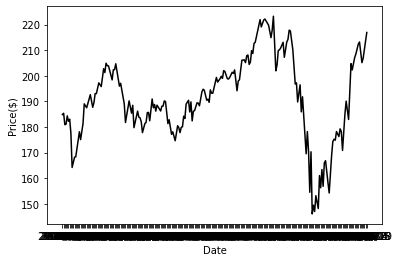

In [293]:
#Plot the main graph
x = loaded_data['Date']
y = loaded_data['Price']

(fig,ax1) = plt.subplots()

ax1.set_xlabel('Date')
ax1.set_ylabel('Price($)')
lax1, = ax1.plot(x,y,color='black',label='Main graph')

In [294]:
#Plot MACD
short_period = 2
long_period = 5
signal_period = 9

In [295]:
#Calculate MACD
macd_input = loaded_data['Price'].values #Convert pandas dataframe to NumPy array.
(macd, macd_signal, macd_histogram) = ti.macd(macd_input, short_period=short_period,long_period=long_period,signal_period=signal_period)
macd_x = loaded_data['Date'].values
macd_x = macd_x[4:] # Skip 1st 4 due to long_period=5.
ax2 = ax1.twinx() # Instantiate a second axes that shares the same x-axis
ax2.set_ylabel('MACD value', color='red')
ax2.tick_params(axis='y', labelcolor='red')

In [296]:
# Draw macd values.
lax2_m1, = ax2.plot(macd_x, macd, color='yellow', label='MACD')
lax2_m2, = ax2.plot(macd_x, macd_signal, color='orange', label='MACD signal')
lax2_m3, = ax2.plot(macd_x, macd_histogram, color='blue', label='MACD histogram')

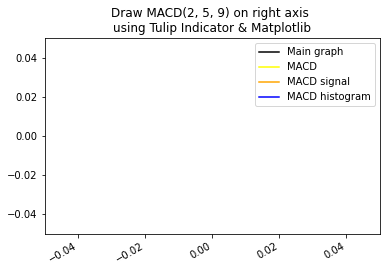

In [299]:
# Customize graph
##########################
# Set graph labels & legend
title='Draw MACD({}, {}, {}) on right axis \nusing Tulip Indicator & Matplotlib'.format(short_period, long_period, signal_period)
plt.title(title)
plt.legend([lax1, lax2_m1, lax2_m2, lax2_m3],['Main graph', 'MACD', 'MACD signal', 'MACD histogram'])
plt.gcf().autofmt_xdate() # Beautify the x-labels
plt.autoscale(tight=True);

#21.Money Flow Index(MFI): A volume-weighted version of RSI that shows shifts is buying and selling pressure.

In [303]:
def money_flow_index(close_data, high_data, low_data, volume, period):
    """
    Money Flow Index.
    Formula:
    MFI = 100 - (100 / (1 + PMF / NMF))
    """
    catch_errors.check_for_input_len_diff(
        close_data, high_data, low_data, volume
        )
    catch_errors.check_for_period_error(close_data, period)

    mf = money_flow(close_data, high_data, low_data, volume)
    tp = typical_price(close_data, high_data, low_data)

    flow = [tp[idx] > tp[idx-1] for idx in range(1, len(tp))]
    pf = [mf[idx] if flow[idx] else 0 for idx in range(0, len(flow))]
    nf = [mf[idx] if not flow[idx] else 0 for idx in range(0, len(flow))]

    pmf = [sum(pf[idx+1-period:idx+1]) for idx in range(period-1, len(pf))]
    nmf = [sum(nf[idx+1-period:idx+1]) for idx in range(period-1, len(nf))]

    # Dividing by 0 is not an issue, it turns the value into NaN which we would
    # want in that case
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=RuntimeWarning)
        money_ratio = np.array(pmf) / np.array(nmf)

    mfi = 100 - (100 / (1 + money_ratio))

    mfi = fill_for_noncomputable_vals(close_data, mfi)

    return mfi

In [304]:
money_flow_index(data1['Close'], data1['High'], data1['Low'], data1['Volume'], 20)

NameError: name 'money_flow' is not defined

#22.Negative Volume Index(NVI): A cumulative volume-based indicator used to identify trend reversals.

In [253]:
def negative_volume_index(data, periods=255, close_col='Close', vol_col='Volume'):
    data['nvi'] = 0.

    for index,row in data.iterrows():
        if index > 0:
            prev_nvi = data.at[index-1, 'nvi']
            prev_close = data.at[index-1, close_col]
            if row[vol_col] < data.at[index-1, vol_col]:
                nvi = prev_nvi + (row[close_col] - prev_close / prev_close * prev_nvi)
            else:
                nvi = prev_nvi
        else:
            nvi = 1000
        data.at(index, 'nvi', nvi)
    data['nvi_ema'] = data['nvi'].ewm(ignore_na=False, min_periods=0, com=periods, adjust=True).mean()
    return data
#TypeError: '_AtIndexer' object is not callable

In [254]:
negative_volume_index(data1)

TypeError: '_AtIndexer' object is not callable

#23.On Balance Volume(OBV): Combines price and volume in a very simple way to show how money may be flowing into or out of a stock.

In [1]:
def on_balance_volume(data, trend_periods=21, close_col='Close', vol_col='Volume'):
    for index, row in data.iterrows():
        if index > 0:
            last_obv = data.at[index - 1, 'obv']
            if row[close_col] > data.at[index - 1, close_col]:
                current_obv = last_obv + row[vol_col]
            elif row[close_col] < data.at[index - 1, close_col]:
                current_obv = last_obv - row[vol_col]
            else:
                current_obv = last_obv
        else:
            last_obv = 0
            current_obv = row[vol_col]

        data.at(index, 'obv', current_obv)

    data['obv_ema' + str(trend_periods)] = data['obv'].ewm(ignore_na=False, min_periods=0,com=trend_periods, adjust=True).mean()

    return data
#TypeError: '_AtIndexer' object is not callable

In [2]:
on_balance_volume(data1)

NameError: name 'data1' is not defined

#24.Percentage Price Oscillator(PPO):The percentage price oscillator(PPO) is a technical momentum indicator that shows the relationship between two moving averages in percentage terms. The moving averages are a 26-period and 12-period exponential moving average(EMA).

In [308]:
from __future__ import absolute_import
from pyti import catch_errors
from pyti.exponential_moving_average import (exponential_moving_average as ema)

In [309]:
def price_oscillator(data, short_period, long_period):
   #Price Oscillator.Formula:(short EMA - long EMA / long EMA) * 100
    catch_errors.check_for_period_error(data, short_period)
    catch_errors.check_for_period_error(data, long_period)
    ema_short = ema(data, short_period)
    ema_long = ema(data, long_period)
    po = ((ema_short - ema_long) / ema_long) * 100
    return po

In [311]:
price_oscillator(data1,14,20)

KeyError: 13

#25.Pring's Know Sure Thing(KST): A momentum oscillator from Martin Pring based on the smoothed rate-of-change for four different timeframes.

In [264]:
def kst_oscillator(df, r1, r2, r3, r4, n1, n2, n3, n4):
   #Calculate KST Oscillator for given data.:param df: pandas.DataFrame;:param r1::param r2::param r3::param r4::param n1::param n2::param n3::param n4::return: pandas.DataFrame
    M = df['Close'].diff(r1 - 1)
    N = df['Close'].shift(r1 - 1)
    ROC1 = M / N
    M = df['Close'].diff(r2 - 1)
    N = df['Close'].shift(r2 - 1)
    ROC2 = M / N
    M = df['Close'].diff(r3 - 1)
    N = df['Close'].shift(r3 - 1)
    ROC3 = M / N
    M = df['Close'].diff(r4 - 1)
    N = df['Close'].shift(r4 - 1)
    ROC4 = M / N
    KST = pd.Series(ROC1.rolling(n1).sum() + ROC2.rolling(n2).sum() * 2 + ROC3.rolling(n3).sum() * 3 +ROC4.rolling(n4).sum() * 4,name='KST_' + str(r1) + '_' + str(r2) + '_' + str(r3) + '_' + str(r4) + '_' + str(n1) + '_' + str(n2) + '_' + str(n3) + '_' + str(n4))
    df = df.join(KST)
    return df

In [265]:
kst_oscillator(data1,1,2,3,4,5,6,7,8)

,Date,Open,High,Low,Close,Adj Close,Volume,ch_osc,nvi,KST_1_2_3_4_5_6_7_8
0,2019-05-20,181.880005,184.229996,181.369995,182.720001,182.720001,10352000,NaN,0.0,NaN
1,2019-05-21,184.570007,185.699997,183.889999,184.820007,184.820007,7502800,NaN,0.0,NaN
2,2019-05-22,184.729996,186.740005,183.610001,185.320007,185.320007,9213800,NaN,0.0,NaN
3,2019-05-23,182.419998,183.899994,179.669998,180.869995,180.869995,12768800,NaN,0.0,NaN
4,2019-05-24,182.330002,183.630005,180.830002,181.059998,181.059998,8807700,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...
248,2020-05-13,209.429993,210.779999,202.110001,205.100006,205.100006,20684600,NaN,0.0,0.645859
249,2020-05-14,202.559998,206.929993,200.690002,206.809998,206.809998,17178900,NaN,0.0,0.183295
250,2020-05-15,205.270004,211.339996,204.119995,210.880005,210.880005,19383200,NaN,0.0,0.202253
251,2020-05-18,212.149994,214.639999,210.940002,213.190002,213.190002,20167400,NaN,0.0,0.280855


#26.Rate of Change(ROC) and Momentum: The Price Rate of Change(ROC) is a momentum-based technical indicator that measures the percentage change in price between the current price and the price a certain number of periods ago. The ROC indicator is plotted against zero, with the indicator moving upwards into positive territory if price changes are to the upside, and moving into negative territory if price changes are to the downside.

In [312]:
from __future__ import absolute_import
from pyti import catch_errors
from pyti.function_helper import fill_for_noncomputable_vals
from six.moves import range

In [314]:
def rate_of_change(data, period):
    #Rate of Change.Formula:(Close - Close n periods ago) / (Close n periods ago) * 100

    catch_errors.check_for_period_error(data, period)

    rocs = [((data[idx] - data[idx - (period - 1)]) /data[idx - (period - 1)]) * 100 for idx in range(period - 1, len(data))]
    rocs = fill_for_noncomputable_vals(data, rocs)
    return rocs

In [315]:
rate_of_change(data1,3)

KeyError: 2

#27.Relative Strength Index(RSI): Shows how strongly a stock is moving in its current direction.

In [270]:
from __future__ import absolute_import
import numpy as np
from pyti import catch_errors
from pyti.function_helper import fill_for_noncomputable_vals
from six.moves import range
from six.moves import zip

In [271]:
def relative_strength_index(data, period):
    #Relative Strength Index.Formula:RSI = 100 - (100 / 1 + (prevGain/prevLoss))

    catch_errors.check_for_period_error(data, period)

    period = int(period)
    changes = [data_tup[1] - data_tup[0] for data_tup in zip(data[::1], data[1::1])]

    filtered_gain = [val < 0 for val in changes]
    gains = [0 if filtered_gain[idx] is True else changes[idx] for idx in range(0, len(filtered_gain))]

    filtered_loss = [val > 0 for val in changes]
    losses = [0 if filtered_loss[idx] is True else abs(changes[idx]) for idx in range(0, len(filtered_loss))]

    avg_gain = np.mean(gains[:period])
    avg_loss = np.mean(losses[:period])

    rsi = []
    if avg_loss == 0:
        rsi.append(100)
    else:
        rs = avg_gain / avg_loss
        rsi.append(100 - (100 / (1 + rs)))

    for idx in range(1, len(data) - period):
        avg_gain = ((avg_gain * (period - 1) + gains[idx + (period - 1)]) / period)
        avg_loss = ((avg_loss * (period - 1) + losses[idx + (period - 1)]) / period)

        if avg_loss == 0:
            rsi.append(100)
        else:
            rs = avg_gain / avg_loss
            rsi.append(100 - (100 / (1 + rs)))

    rsi = fill_for_noncomputable_vals(data, rsi)

    return rsi

In [272]:
relative_strength_index(data1,3)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

#28.Stochastic Oscillator(Fast,Slow,and Full): Shows how a stock's price is doing relative to past movements.Fast,Slow and Full Stochastics are explained.

In [273]:
from __future__ import absolute_import
import numpy as np
from pyti import catch_errors
from pyti.function_helper import fill_for_noncomputable_vals
from pyti.simple_moving_average import (simple_moving_average as sma)
from six.moves import range

In [274]:
def percent_k(data, period):
    #%K.Formula:%k = data(t) - low(n) / (high(n) - low(n))

    catch_errors.check_for_period_error(data, period)
    percent_k = [((data[idx] - np.min(data[idx+1-period:idx+1])) /(np.max(data[idx+1-period:idx+1]) -np.min(data[idx+1-period:idx+1]))) for idx in range(period-1, len(data))]
    percent_k = fill_for_noncomputable_vals(data, percent_k)

    return percent_k
#I'm not very understanding about the code with period index.

In [275]:
def percent_d(data, period):
    #%D.Formula:%D = SMA(%K, 3)

    p_k = percent_k(data, period)
    percent_d = sma(p_k, 3)

    return percent_d

In [277]:
percent_k(data1,7)
percent_d(data1,7)

KeyError: 2

#29.Triple Exponential Average(TRIX): The triple exponential average(TRIX) indicator is an oscillator used to identify oversold and overbought markets, and it can also be used as a momentum indicator. Like many oscillators, TRIX oscillates around a zero line. When it is used as an oscillator, a positive value indicates an overbought market while a negative value indicates an oversold market.

In [278]:
def trix(data, periods=14, signal_periods=9, close_col='Close'):
    data['trix'] = data[close_col].ewm(ignore_na=False, min_periods=0, com=periods, adjust=True).mean()
    data['trix'] = data['trix'].ewm(ignore_na=False, min_periods=0, com=periods, adjust=True).mean()
    data['trix'] = data['trix'].ewm(ignore_na=False, min_periods=0, com=periods, adjust=True).mean()
    data['trix_signal'] = data['trix'].ewm(ignore_na=False, min_periods=0, com=signal_periods,adjust=True).mean()

    return data

In [279]:
trix(data1)

,Date,Open,High,Low,Close,Adj Close,Volume,ch_osc,nvi,trix,trix_signal
0,2019-05-20,181.880005,184.229996,181.369995,182.720001,182.720001,10352000,NaN,0.0,182.720001,182.720001
1,2019-05-21,184.570007,185.699997,183.889999,184.820007,184.820007,7502800,NaN,0.0,183.010604,182.872950
2,2019-05-22,184.729996,186.740005,183.610001,185.320007,185.320007,9213800,NaN,0.0,183.242623,183.009361
3,2019-05-23,182.419998,183.899994,179.669998,180.869995,180.869995,12768800,NaN,0.0,183.337253,183.104706
4,2019-05-24,182.330002,183.630005,180.830002,181.059998,181.059998,8807700,NaN,0.0,183.355675,183.165991
...,...,...,...,...,...,...,...,...,...,...,...
248,2020-05-13,209.429993,210.779999,202.110001,205.100006,205.100006,20684600,NaN,0.0,182.070620,185.455167
249,2020-05-14,202.559998,206.929993,200.690002,206.809998,206.809998,17178900,NaN,0.0,182.123527,185.122003
250,2020-05-15,205.270004,211.339996,204.119995,210.880005,210.880005,19383200,NaN,0.0,182.226319,184.832435
251,2020-05-18,212.149994,214.639999,210.940002,213.190002,213.190002,20167400,NaN,0.0,182.377534,184.586945


#30.Ultimate Oscillator: Combines long-term,mid-term and short-term moving averages into one number.

In [280]:
from __future__ import absolute_import
import numpy as np
from pyti import catch_errors
from pyti.function_helper import fill_for_noncomputable_vals
from pyti.true_range import true_range
from six.moves import range

In [282]:
def buying_pressure(close_data, low_data):
    #Buying Pressure.Formula:BP = current close - min()

    catch_errors.check_for_input_len_diff(close_data, low_data)
    bp = [close_data[idx] - np.min([low_data[idx], close_data[idx-1]]) for idx in range(1, len(close_data))]
    bp = fill_for_noncomputable_vals(close_data, bp)

    return bp

In [283]:
def avg_helper(close_data, low_data, period):
    catch_errors.check_for_input_len_diff(close_data, low_data)
    catch_errors.check_for_period_error(close_data, period)
    bp = buying_pressure(close_data, low_data)
    tr = true_range(close_data, period)
    avg = [sum(bp[idx+1-period:idx+1]) / sum(tr[idx+1-period:idx+1]) for idx in range(period-1,len(close_data))]
    avg = fill_for_noncomputable_vals(close_data, avg)

    return avg

In [284]:
def average_7(close_data, low_data, period=7):
    #Average7.Formula:AVG7 = SUM(BP) / SUM(TR) for 7 days
    return avg_helper(close_data, low_data, period)

In [285]:
def average_14(close_data, low_data, period=14):
    #Averag14.Formula:AVG14 = SUM(BP) / SUM(TR) for 14 days
    return avg_helper(close_data, low_data, period)

In [286]:
def average_28(close_data, low_data, period=28):
    #Average_28.Formula:AVG28 = SUM(BP) / SUM(TR) for 28 days
    return avg_helper(close_data, low_data, period)

In [287]:
def ultimate_oscillator(close_data, low_data):
    #Ultimate Oscillator.Formula:UO = 100 * ((4 * AVG7) + (2 * AVG14) + AVG28) / (4 + 2 + 1)
    a7 = 4 * average_7(close_data, low_data)
    a14 = 2 * average_14(close_data, low_data)
    a28 = average_28(close_data, low_data)
    uo = 100 * ((a7 + a14 + a28) / 7)
    return uo

In [289]:
ultimate_oscillator(data1['Adj Close'],data1['Low'])

array([        nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan, 16.23340984,
       17.71947794, 19.43169079, 18.02035326, 17.43894509, 18.46388026,
       17.79434324, 18.45927831, 17.2269214 , 14.65935828, 15.59110201,
       14.88405767, 14.57333652, 15.55367243, 15.85421969, 15.62

#31.Vortex Indicator: An indicator designed to identify the start of a new trend and define the current trend.

In [290]:
# Import Built-Ins
import logging
# Import Third-Party
import pandas as pd
import numpy as np
# Import Homebrew
# Init Logging Facilities
log = logging.getLogger(__name__)

In [291]:
def vortex_indicator(df, n):
    #Calculate the Vortex Indicator for given data.Vortex Indicator described here:http://www.vortexindicator.com/VFX_VORTEX.PDF:param df: pandas.DataFrame:param n::return: pandas.DataFrame

    i = 0
    TR = [0]
    while i < df.index[-1]:
        Range = max(df.loc[i + 1, 'High'], df.loc[i, 'Close']) - min(df.loc[i + 1, 'Low'], df.loc[i, 'Close'])
        TR.append(Range)
        i = i + 1
    i = 0
    VM = [0]
    while i < df.index[-1]:
        Range = abs(df.loc[i + 1, 'High'] - df.loc[i, 'Low']) - abs(df.loc[i + 1, 'Low'] - df.loc[i, 'High'])
        VM.append(Range)
        i = i + 1

    VI = pd.Series(pd.Series(VM).rolling(n).sum() / pd.Series(TR).rolling(n).sum(), name='Vortex_' + str(n))
    df = df.join(VI)
    return df

In [292]:
vortex_indicator(data1, 3)

,Date,Open,High,Low,Close,Adj Close,Volume,ch_osc,nvi,trix,trix_signal,Vortex_3
0,2019-05-20,181.880005,184.229996,181.369995,182.720001,182.720001,10352000,NaN,0.0,182.720001,182.720001,NaN
1,2019-05-21,184.570007,185.699997,183.889999,184.820007,184.820007,7502800,NaN,0.0,183.010604,182.872950,NaN
2,2019-05-22,184.729996,186.740005,183.610001,185.320007,185.320007,9213800,NaN,0.0,183.242623,183.009361,0.777417
3,2019-05-23,182.419998,183.899994,179.669998,180.869995,180.869995,12768800,NaN,0.0,183.337253,183.104706,-0.172619
4,2019-05-24,182.330002,183.630005,180.830002,181.059998,181.059998,8807700,NaN,0.0,183.355675,183.165991,-0.443004
...,...,...,...,...,...,...,...,...,...,...,...,...
248,2020-05-13,209.429993,210.779999,202.110001,205.100006,205.100006,20684600,NaN,0.0,182.070620,185.455167,-0.601185
249,2020-05-14,202.559998,206.929993,200.690002,206.809998,206.809998,17178900,NaN,0.0,182.123527,185.122003,-0.879149
250,2020-05-15,205.270004,211.339996,204.119995,210.880005,210.880005,19383200,NaN,0.0,182.226319,184.832435,-0.443742
251,2020-05-18,212.149994,214.639999,210.940002,213.190002,213.190002,20167400,NaN,0.0,182.377534,184.586945,0.736934


#32.Williams %R: Uses Stochastics to determine overbought and oversold levels.

In [293]:
from __future__ import absolute_import
import numpy as np

In [294]:
def williams_percent_r(close_data):
    #Williams %R.Formula:wr = (HighestHigh - close / HighestHigh - LowestLow) * -100

    highest_high = np.max(close_data)
    lowest_low = np.min(close_data)
    wr = [((highest_high - close) / (highest_high - lowest_low)) * -100 for close in close_data]
    return wr

In [295]:
williams_percent_r(data1['Adj Close'])

[-52.4604953061319,
 -49.740984851839094,
 -49.09348421272359,
 -54.85625544086695,
 -54.610201312999195,
 -50.40144715874841,
 -53.14684468859306,
 -52.08495270545257,
 -59.25925201684471,
 -76.50867810789073,
 -72.17041605580917,
 -71.30276778939695,
 -71.09556240487487,
 -64.59465080815008,
 -62.69099763414921,
 -58.44339473655277,
 -62.40611548295632,
 -59.25925201684471,
 -54.26054578787172,
 -44.3149450360665,
 -45.01423795630358,
 -46.29629569675867,
 -43.641539191381256,
 -41.556587133429346,
 -39.6658762022031,
 -44.53509395836451,
 -46.06318510666684,
 -43.68038793472691,
 -39.14788346091837,
 -39.14788346091837,
 -36.55788090445635,
 -33.708881977351965,
 -34.74488688494061,
 -35.57368640800716,
 -31.105916458094818,
 -26.54752620373574,
 -28.490028121082254,
 -23.776224763322666,
 -25.019414335412904,
 -25.11007478489934,
 -27.751868327481628,
 -29.072774811282375,
 -32.206675314598854,
 -27.07846248279639,
 -27.026670201674808,
 -24.04816337673964,
 -29.1634145407483,
 -30